# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
#Data Visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style


# Algorithms
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Getting Data

In [2]:
census=pd.read_csv('adult.csv')
census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
census.shape

(32561, 15)

# Statistical Description

In [4]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Income,Native_country,sex,race,relationship,occupation,marital_status,education,workclass all those are objects and other than these every other feature is in integer format.

In [5]:
census.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Minimum age is 17 years and maximum age is 90 years.Minimum capital loss is 0 and Maximum capital loss is 4356.

# Exploratory Data Analysis

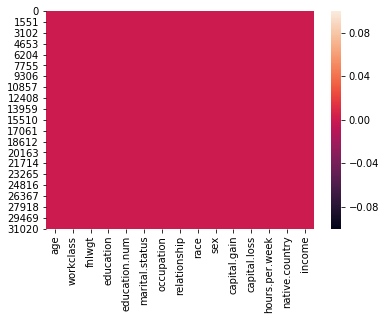

In [6]:
#check weather null data is present or not
sns.heatmap(census.isnull())

There is a null data need to remove it.

In [7]:
census.loc[census['workclass']=='?','workclass']='Un-identified'

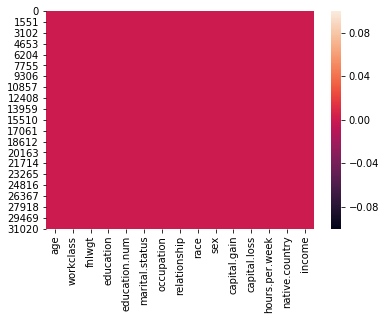

In [8]:
sns.heatmap(census.isnull())

it's clear upto now.

### Most of the peoples  their highest education level?

In [9]:
census['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

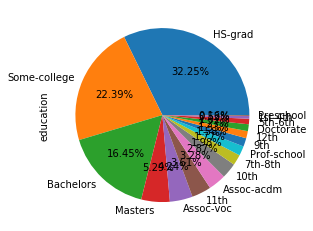

In [10]:
census['education'].value_counts().plot.pie(autopct="%2.2f%%")

32% of the peoples highest education level is High-school-Graduation.And next 22% of peoples highest eduational level is upto Some-college.
16% of the peoples highest education level is Bachelors.

## Which type of race peoples are more?

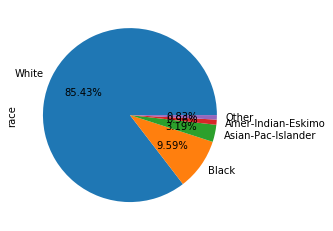

In [11]:
census['race'].value_counts().plot.pie(autopct="%2.2f%%")

Here we can onserve that 85% of peoples race is white.Rest of percentage is all other races.

## Which type of Race peoples are more along with capital loss?

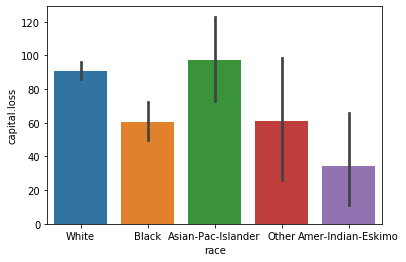

In [12]:
sns.barplot(x='race',y='capital.loss',data=census)

#### Observations:

From above we can observe that Asian-pac-islander race peoples are more and their capital loss is too high.compare to all other Races.

> And Least Amer-indian-Eskimo race peoples are there and their capital loss is also very low.

In [13]:
census.loc[census['occupation']=='?','occupation']='Un-identified'

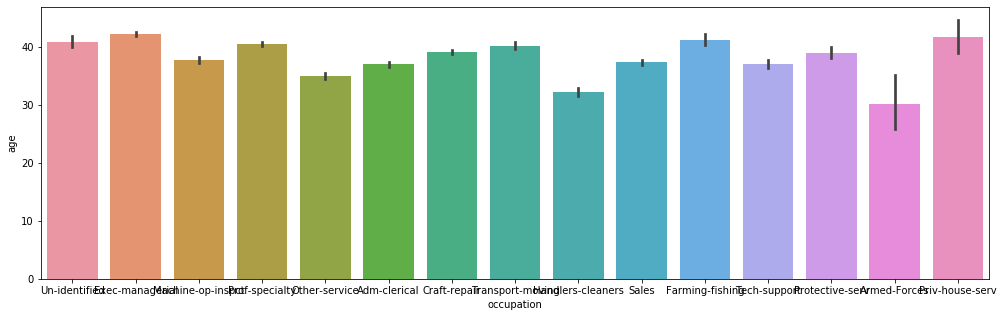

In [14]:
plt.figure(figsize=(17,5))
sns.barplot(x='occupation',y='age',data=census)

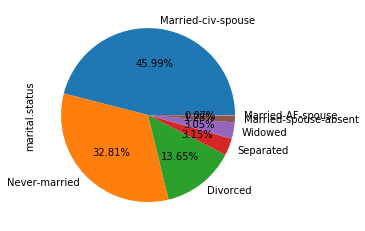

In [15]:
census['marital.status'].value_counts().plot.pie(autopct="%2.2f%%")

46 persons are Married-civ-spouse and 33 % are Never married.

Text(0.5, 0, 'age')

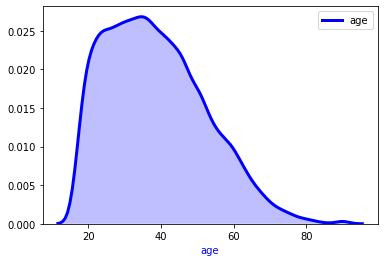

In [16]:
sns.kdeplot(census['age'],shade=True,c='blue',linewidth=3)
plt.xlabel("age",c="Blue")

here you can see most of peoples age is in between 20-50.

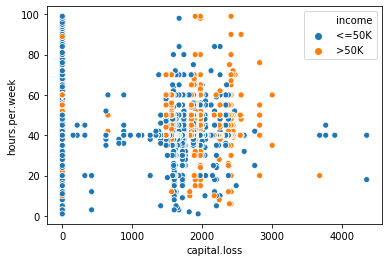

In [17]:
sns.scatterplot(x='capital.loss',y='hours.per.week',hue='income',data =census)

Capitalloss is in between 1500-2500 and hours per week is in between 20-60 in that case income is greater than 50k.

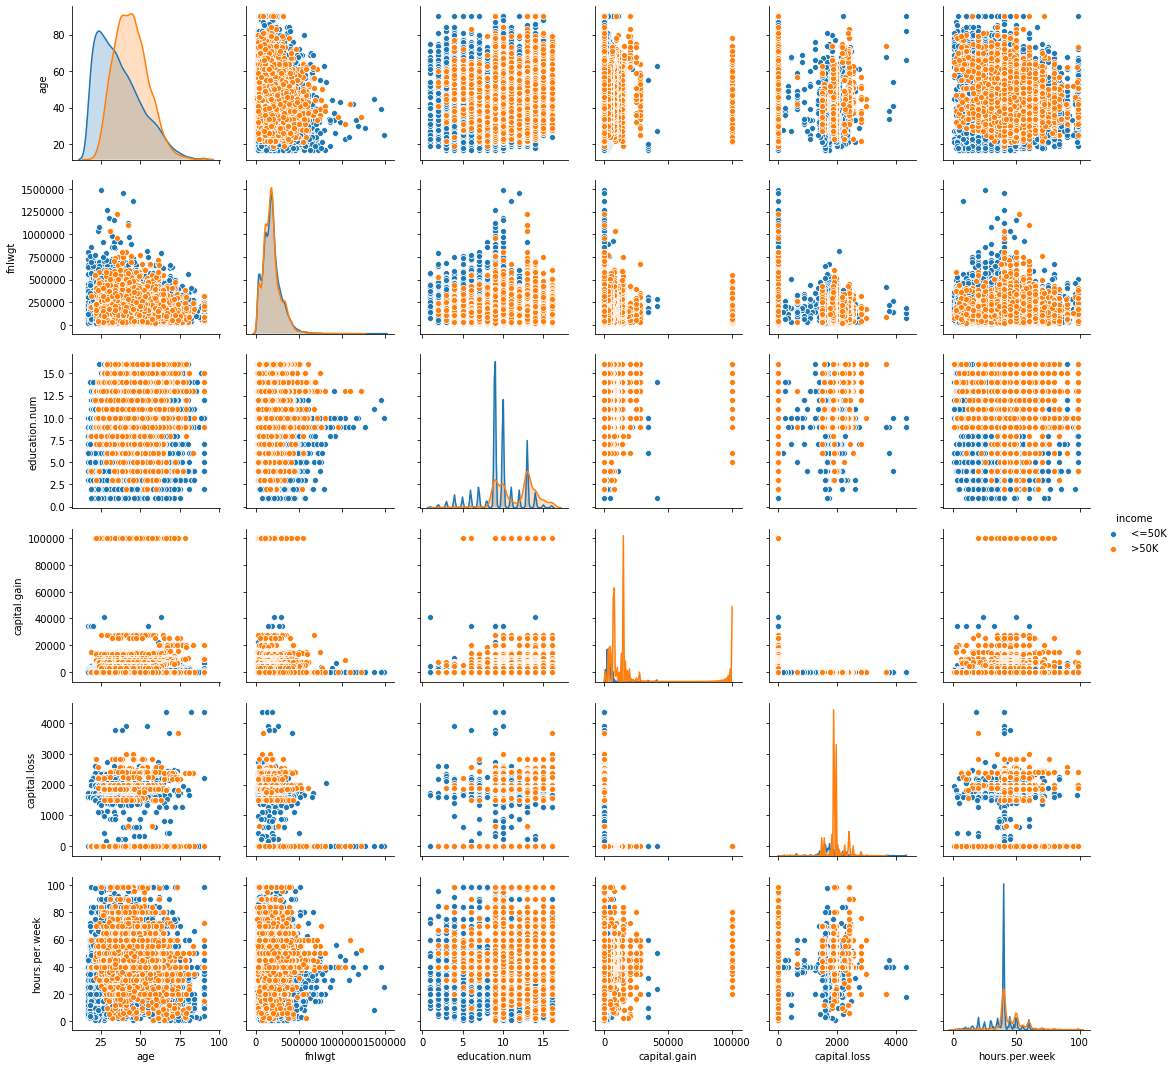

In [18]:
sns.pairplot(census ,hue ='income', vars =['age', 'fnlwgt', 'education.num',
       'capital.gain', 'capital.loss', 'hours.per.week'])

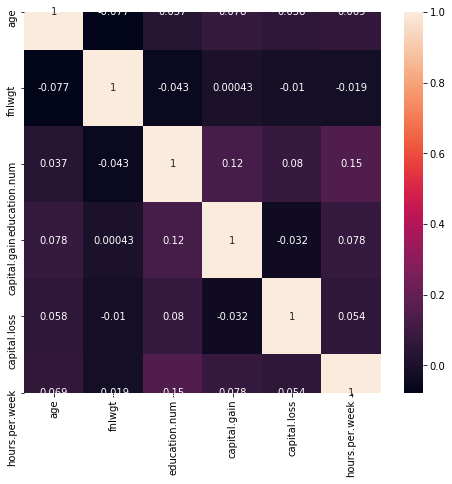

In [19]:
#check cor-relation
corr_hmap=census.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)

Relationship with sex is highly negatively cor-relate and all other features are perfect.

# Data_Cleansing

In [20]:
census['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Un-identified        1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [21]:
census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Un-identified,77053,HS-grad,9,Widowed,Un-identified,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Un-identified,186061,Some-college,10,Widowed,Un-identified,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [22]:
census['fnlwgt'].isnull().sum()

0

It's clear there is no null data in this column.

In [23]:
census.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

From here you may see that data had been changed.

In [24]:
#cleaning data from string to integer format
le=LabelEncoder()
list1=['marital.status','race','sex','native.country','relationship','occupation','workclass','education','income']
for val in list1:
    census[val]=le.fit_transform(census[val].astype(str))

In [25]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null int32
fnlwgt            32561 non-null int64
education         32561 non-null int32
education.num     32561 non-null int64
marital.status    32561 non-null int32
occupation        32561 non-null int32
relationship      32561 non-null int32
race              32561 non-null int32
sex               32561 non-null int32
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null int32
income            32561 non-null int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


Here you can see that complete data had been changed to integer format.

# Detecting and Removing Outliers

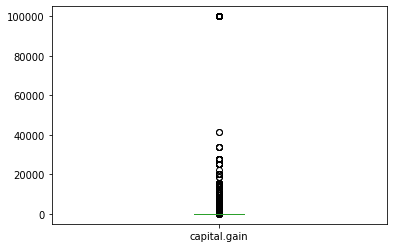

In [26]:
census['capital.gain'].plot.box()

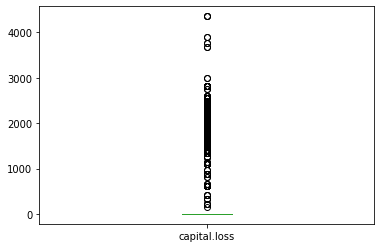

In [27]:
census['capital.loss'].plot.box()

age                  AxesSubplot(0.125,0.536818;0.0824468x0.343182)
workclass         AxesSubplot(0.223936,0.536818;0.0824468x0.343182)
fnlwgt            AxesSubplot(0.322872,0.536818;0.0824468x0.343182)
education         AxesSubplot(0.421809,0.536818;0.0824468x0.343182)
education.num     AxesSubplot(0.520745,0.536818;0.0824468x0.343182)
marital.status    AxesSubplot(0.619681,0.536818;0.0824468x0.343182)
occupation        AxesSubplot(0.718617,0.536818;0.0824468x0.343182)
relationship      AxesSubplot(0.817553,0.536818;0.0824468x0.343182)
race                    AxesSubplot(0.125,0.125;0.0824468x0.343182)
sex                  AxesSubplot(0.223936,0.125;0.0824468x0.343182)
capital.gain         AxesSubplot(0.322872,0.125;0.0824468x0.343182)
capital.loss         AxesSubplot(0.421809,0.125;0.0824468x0.343182)
hours.per.week       AxesSubplot(0.520745,0.125;0.0824468x0.343182)
native.country       AxesSubplot(0.619681,0.125;0.0824468x0.343182)
income               AxesSubplot(0.718617,0.125;

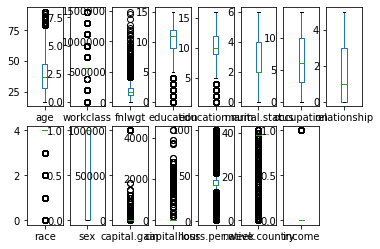

In [28]:
census.plot(kind='box',subplots=True,layout=(2,8))

Here you can observe there is alot of outliers present in this dataset and It's better to remove those outliers by applying outliers removal techniques.

In [29]:
#Removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(census))
z

array([[3.76961234, 2.57739602, 1.06799736, ..., 0.03542945, 0.29156857,
        0.56319851],
       [3.18311167, 0.22443659, 0.53916866, ..., 1.81720429, 0.29156857,
        0.56319851],
       [2.01011032, 2.57739602, 0.03521956, ..., 0.03542945, 0.29156857,
        0.56319851],
       ...,
       [0.10398314, 0.22443659, 0.33543266, ..., 0.03542945, 0.29156857,
        1.77557289],
       [1.42360965, 0.22443659, 0.35877741, ..., 0.03542945, 0.29156857,
        0.56319851],
       [1.21564337, 0.22443659, 0.11095988, ..., 1.65522476, 0.29156857,
        0.56319851]])

In [30]:
threshold=3
np.where((z>3))

(array([    0,     0,     1, ..., 32536, 32552, 32554], dtype=int64),
 array([ 0, 11,  0, ...,  8,  8,  8], dtype=int64))

In [31]:
z[0][11]

10.59350656326494

In [32]:
z[1][13]

0.29156856992862495

In [33]:
census_new=census[(z<3).all(axis=1)]#removing outliers

In [34]:
census.shape

(32561, 15)

In [35]:
census_new.shape

(27405, 15)

4783 rows had been removed as an outliers.

# Check Distribution Of Skewness

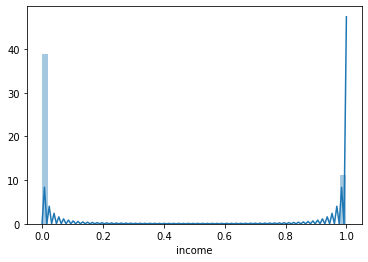

In [36]:
sns.distplot(census_new['income'])

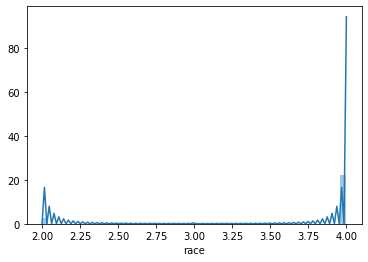

In [37]:
sns.distplot(census_new['race'])

In [38]:
collist=census_new.columns
ncol=15
nrows=13

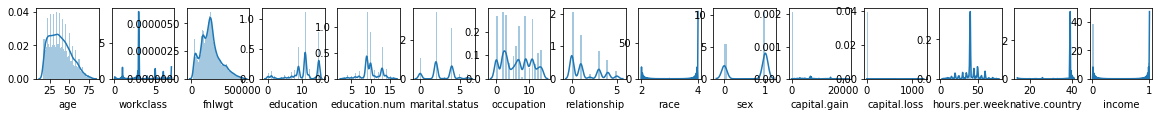

In [39]:
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(census_new[collist[i]])

capital loss contains alot of skewness and need to remove the skewness of these features.

In [40]:
x=census_new.iloc[:,:-1]
x.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1470,62,1,159908,9,13,2,0,5,4,0,0,1258,38,39
1471,72,1,144515,10,16,2,3,0,4,1,0,1258,40,39
1472,76,7,224680,14,15,2,14,0,4,1,0,1258,20,39
1473,66,3,350498,15,10,2,13,0,4,1,0,1258,20,39
1474,33,1,262042,11,9,0,0,3,4,0,0,1138,40,39


In [41]:
y=census_new.iloc[:,-1]
y.head()

1470    0
1471    0
1472    0
1473    0
1474    0
Name: income, dtype: int32

In [42]:
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

In [43]:
x.skew()

age                0.483482
workclass         -1.403221
fnlwgt            -0.955177
education         -0.957357
education.num     -0.144045
marital.status    -0.044536
occupation         0.137240
relationship       0.253484
race              -2.592771
sex               -0.684277
capital.gain       3.112857
capital.loss      24.841474
hours.per.week    -0.358524
native.country    -5.459363
dtype: float64

capital gain and loss both still have skewness.

# Building a Machine Learning Model

In [44]:
x=x.drop(['capital.gain','capital.loss'],axis=1)

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=100,random_state=42)

In [46]:
x_train.shape

(27305, 12)

In [47]:
x_test.shape

(100, 12)

In [48]:
y_train.shape

(27305,)

In [49]:
y_test.shape

(100,)

In [50]:
#Applying Standard Scaling to get optimized result
sc=StandardScaler()

In [51]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [52]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
lg=LogisticRegression()
knc=KNeighborsClassifier()
sgc=SGDClassifier()

************** DecisionTreeClassifier ***********


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


accuracy score 0.82
Cross-val-score= 0.7823762116227838


roc_auc_score 0.7375


              precision    recall  f1-score   support

           0       0.90      0.88      0.89        80
           1       0.55      0.60      0.57        20

    accuracy                           0.82       100
   macro avg       0.72      0.74      0.73       100
weighted avg       0.83      0.82      0.82       100



[[70 10]
 [ 8 12]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


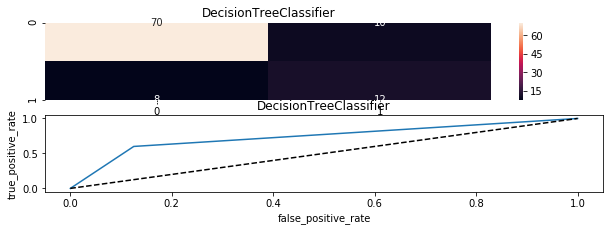

************** RandomForestClassifier ***********


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


accuracy score 0.85
Cross-val-score= 0.8228803736141924


roc_auc_score 0.7


              precision    recall  f1-score   support

           0       0.87      0.95      0.91        80
           1       0.69      0.45      0.55        20

    accuracy                           0.85       100
   macro avg       0.78      0.70      0.73       100
weighted avg       0.84      0.85      0.84       100



[[76  4]
 [11  9]]


AxesSubplot(0.125,0.808774;0

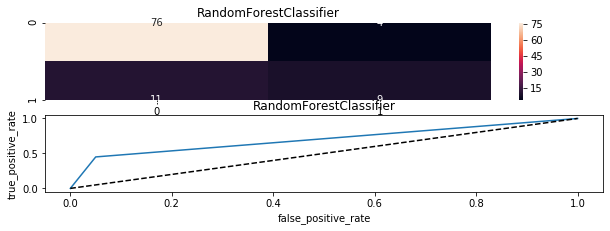

************** KNeighborsClassifier ***********


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


accuracy score 0.85
Cross-val-score= 0.8062766032397823


roc_auc_score 0.7749999999999999


              precision    recall  f1-score   support

           0       0.91      0.90      0.91        80
           1       0.62      0.65      0.63        20

    accuracy                           0.85       100
   macro avg       0.77      0.78      0.77       100
weighted avg       0.85      0.85      0.85       100



[[72  8]
 [ 7 13]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


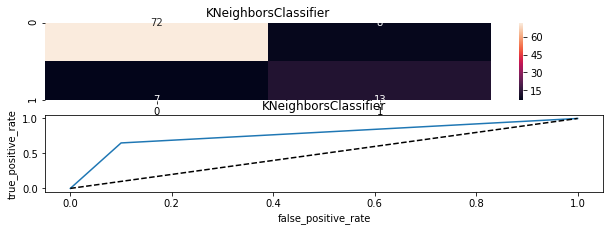

************** SGDClassifier ***********


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


accuracy score 0.88
Cross-val-score= 0.7203054694849234


roc_auc_score 0.71875


              precision    recall  f1-score   support

           0       0.88      0.99      0.93        80
           1       0.90      0.45      0.60        20

    accuracy                           0.88       100
   macro avg       0.89      0.72      0.76       100
weighted avg       0.88      0.88      0.86       100



[[79  1]
 [11  9]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


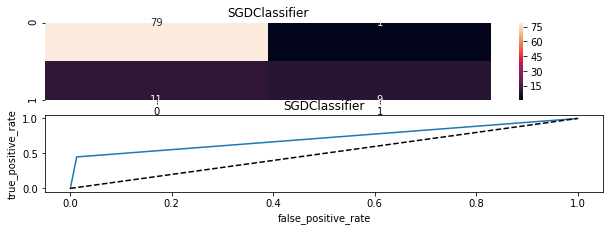

************** LogisticRegression ***********


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


accuracy score 0.91
Cross-val-score= 0.818279916089005


roc_auc_score 0.8125


              precision    recall  f1-score   support

           0       0.92      0.97      0.95        80
           1       0.87      0.65      0.74        20

    accuracy                           0.91       100
   macro avg       0.89      0.81      0.84       100
weighted avg       0.91      0.91      0.90       100



[[78  2]
 [ 7 13]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


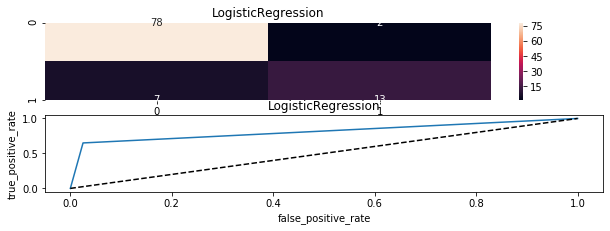

In [53]:
seed=10
models=[]
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('KNeighborsClassifier',knc))
models.append(('SGDClassifier',sgc))
models.append(('LogisticRegression',lg))



#evaluate each model in turn
Model=[]
cvs=[]
score=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    acc=accuracy_score(y_test,pred)
    print('accuracy score',acc)
    score.append(acc*100)
    kfold=model_selection.KFold(random_state=seed)
    cv=model_selection.cross_val_score(model,x,y,cv=15,scoring='accuracy').mean()
    print('Cross-val-score=',cv)
    cvs.append(cv*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc=roc_auc_score(y_test,pred)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print(classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('false_positive_rate')
    plt.ylabel('true_positive_rate')
    plt.show()

In [54]:
result=pd.DataFrame({'Model':Model,'cvs':cvs,'score':score,'rocscore':rocscore},columns=['Model','cvs','score','rocscore'])
result

,Model,cvs,score,rocscore
0,DecisionTreeClassifier,78.237621,82.0,73.750
1,RandomForestClassifier,82.288037,85.0,70.000
2,KNeighborsClassifier,80.627660,85.0,77.500
3,SGDClassifier,72.030547,88.0,71.875
4,LogisticRegression,81.827992,91.0,81.250


From here we can observe that Logistic regression has very good accuracy compare to all other models and f-score is also too good for this Logistic regression.

# Predicting Data:

In [55]:
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print("predicted wins",pred)
print("actual wins",y_test)

predicted wins [1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0]
actual wins 19009    1
29488    0
12863    0
2482     1
22708    0
        ..
24714    1
23963    0
9605     1
30371    0
25946    0
Name: income, Length: 100, dtype: int32


# Saving Model

In [56]:
census_new=pd.DataFrame(pred)
census_new.to_csv('lg_census.csv')

In [57]:
from sklearn.externals import joblib
#save the model as a pickle in a file
joblib.dump(lg,'census.obj')
#load the model from a file
dct_from_joblib=joblib.load('census.obj')
#use the loaded model to make prediction
dct_from_joblib.predict(x_test)

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0])

Upto now Training a model has been done.